In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Load dataset
flights = sns.load_dataset("flights")
print(flights.head())

   year month  passengers
0  1949   Jan         112
1  1949   Feb         118
2  1949   Mar         132
3  1949   Apr         129
4  1949   May         121


In [ ]:
# Check data info
print(flights.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   year        144 non-null    int64   
 1   month       144 non-null    category
 2   passengers  144 non-null    int64   
dtypes: category(1), int64(2)
memory usage: 2.9 KB
None


In [ ]:
# Summary statistics
print(flights.describe())

              year  passengers
count   144.000000  144.000000
mean   1954.500000  280.298611
std       3.464102  119.966317
min    1949.000000  104.000000
25%    1951.750000  180.000000
50%    1954.500000  265.500000
75%    1957.250000  360.500000
max    1960.000000  622.000000


In [ ]:
# Check for missing values
print(flights.isnull().sum())

year          0
month         0
passengers    0
dtype: int64


In [ ]:
print(flights.duplicated().sum())

0


In [ ]:
#yearly total passengers and percentage growth year-over-year.

# Yearly total passengers
yearly_passengers = flights.groupby('year')['passengers'].sum().reset_index()

# Calculate year-over-year growth
yearly_passengers['YoY_Growth'] = yearly_passengers['passengers'].pct_change() * 100

print(yearly_passengers)

#Insight: You can see how passenger numbers grew each year and identify trends.

    year  passengers  YoY_Growth
0   1949        1520         NaN
1   1950        1676   10.263158
2   1951        2042   21.837709
3   1952        2364   15.768854
4   1953        2700   14.213198
5   1954        2867    6.185185
6   1955        3408   18.869899
7   1956        3939   15.580986
8   1957        4421   12.236608
9   1958        4572    3.415517
10  1959        5140   12.423447
11  1960        5714   11.167315


In [ ]:
#Average passengers per month across all years. This helps understand seasonal trends.

# Monthly average passengers
monthly_avg = flights.groupby('month')['passengers'].mean().reset_index()

# Sort months in calendar order
months_order = flights['month'].unique()
monthly_avg['month'] = pd.Categorical(monthly_avg['month'], categories=months_order, ordered=True)
monthly_avg = monthly_avg.sort_values('month')

print(monthly_avg)

   month  passengers
0    Jan  241.750000
1    Feb  235.000000
2    Mar  270.166667
3    Apr  267.083333
4    May  271.833333
5    Jun  311.666667
6    Jul  351.333333
7    Aug  351.083333
8    Sep  302.416667
9    Oct  266.583333
10   Nov  232.833333
11   Dec  261.833333


/tmp/ipython-input-3190510558.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_avg = flights.groupby('month')['passengers'].mean().reset_index()


In [ ]:
# Find busiest month per year
busiest = flights.loc[flights.groupby("year")["passengers"].idxmax(), ["year", "month", "passengers"]]
print("Busiest Month per Year:\n", busiest)

# Find least busy month per year
least_busy = flights.loc[flights.groupby("year")["passengers"].idxmin(), ["year", "month", "passengers"]]
print("\nLeast Busy Month per Year:\n", least_busy)

Busiest Month per Year:
      year month  passengers
6    1949   Jul         148
18   1950   Jul         170
30   1951   Jul         199
43   1952   Aug         242
55   1953   Aug         272
66   1954   Jul         302
78   1955   Jul         364
90   1956   Jul         413
103  1957   Aug         467
115  1958   Aug         505
127  1959   Aug         559
138  1960   Jul         622

Least Busy Month per Year:
      year month  passengers
10   1949   Nov         104
22   1950   Nov         114
24   1951   Jan         145
36   1952   Jan         171
58   1953   Nov         180
61   1954   Feb         188
73   1955   Feb         233
94   1956   Nov         271
97   1957   Feb         301
118  1958   Nov         310
121  1959   Feb         342
142  1960   Nov         390


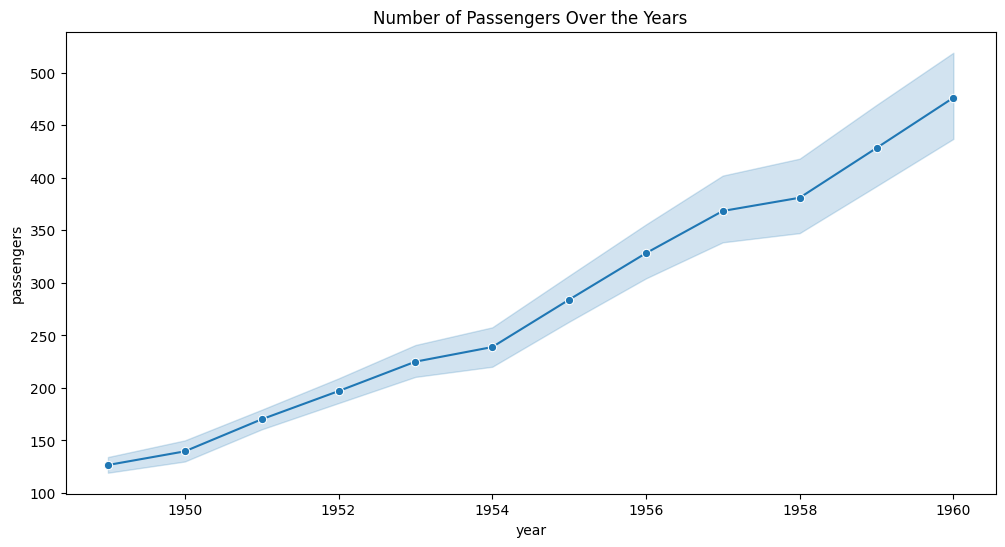

In [ ]:
plt.figure(figsize=(12,6))
sns.lineplot(data=flights, x="year", y="passengers", marker="o")
plt.title("Number of Passengers Over the Years")
plt.show()

/tmp/ipython-input-4032564704.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  flights_pivot = flights.pivot_table(index="month", columns="year", values="passengers")


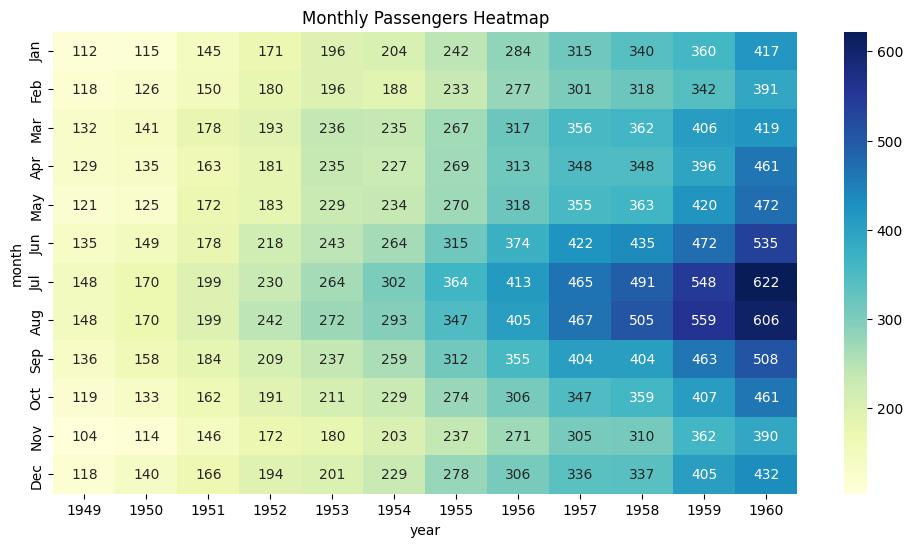

In [ ]:
# Pivot the data
flights_pivot = flights.pivot_table(index="month", columns="year", values="passengers")

plt.figure(figsize=(12,6))
sns.heatmap(flights_pivot, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title("Monthly Passengers Heatmap")
plt.show()

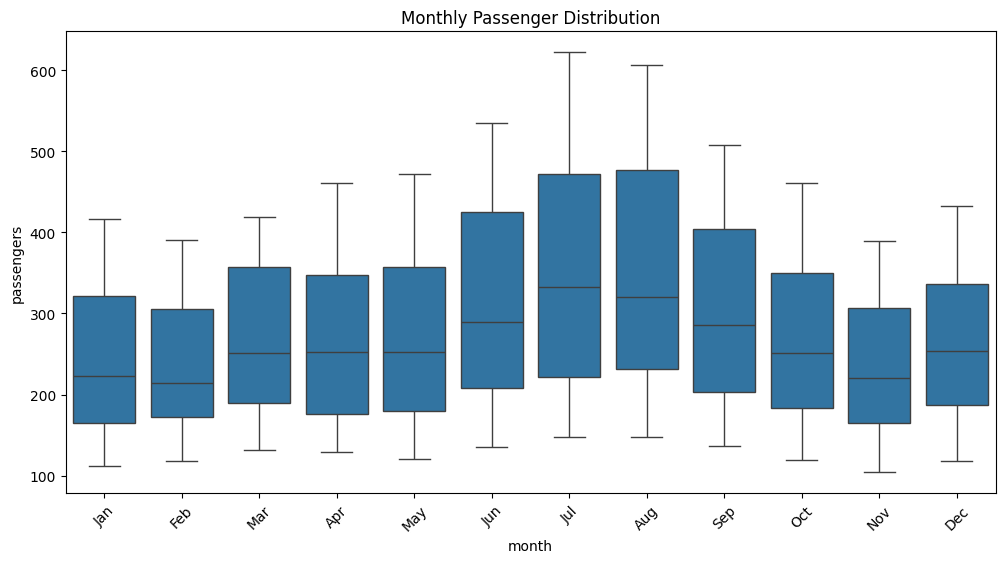

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(data=flights, x="month", y="passengers")
plt.title("Monthly Passenger Distribution")
plt.xticks(rotation=45)
plt.show()

/tmp/ipython-input-2572387391.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=yearly_passengers, x="year", y="passengers", palette="coolwarm")


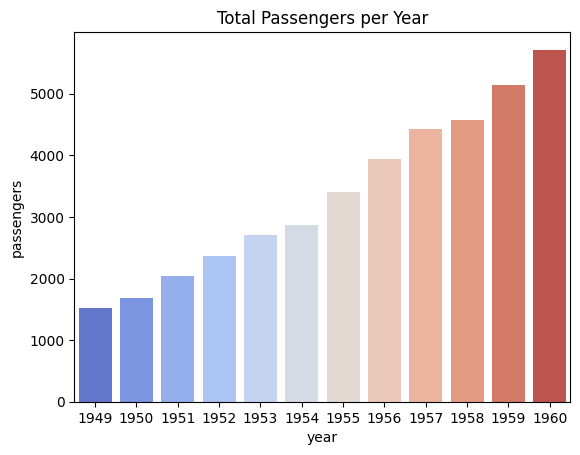

In [ ]:
yearly_passengers = flights.groupby("year")["passengers"].sum().reset_index()
sns.barplot(data=yearly_passengers, x="year", y="passengers", palette="coolwarm")
plt.title("Total Passengers per Year")
plt.show()

In [ ]:
# Mean, Median, Std
mean_passengers = flights['passengers'].mean()
median_passengers = flights['passengers'].median()
std_passengers = flights['passengers'].std()

print(f"Mean: {mean_passengers}, Median: {median_passengers}, Std: {std_passengers}")

Mean: 280.2986111111111, Median: 265.5, Std: 119.96631694294321


In [ ]:
# Map months to numbers
month_mapping = {month:i for i, month in enumerate(flights['month'].unique(), 1)}
flights['month_num'] = flights['month'].map(month_mapping)
# Correlation matrix
corr = flights[['year', 'month_num', 'passengers']].corr()
print(corr)

                    year     month_num  passengers
year        1.000000e+00  1.344483e-14    0.921824
month_num   1.344483e-14  1.000000e+00    0.063649
passengers  9.218238e-01  6.364920e-02    1.000000


In [ ]:
# Descriptive statistics
passenger_stats = flights['passengers'].describe()
print(passenger_stats)

# Additional statistics
variance = flights['passengers'].var()
range_passengers = flights['passengers'].max() - flights['passengers'].min()

print(f"Variance: {variance}")
print(f"Range: {range_passengers}")

count    144.000000
mean     280.298611
std      119.966317
min      104.000000
25%      180.000000
50%      265.500000
75%      360.500000
max      622.000000
Name: passengers, dtype: float64
Variance: 14391.917200854701
Range: 518
